# Problem
Can the sale amount for properties in Conneticut be predicted?

Also, where are the best places to buy? Best places to sell? places with the best/worst sale ratios?

Through understanding this dataset, real estate buyers and sellers in Conneticut can make smart sales and purchases.

# Data Collection
Data sourced from Connecticut Open Data

https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2023-GL/5mzw-sjtu/about_data

In [1]:
import pandas as pd
df = pd.read_csv(
    'Real_Estate_Sales_2001-2023_GL.csv',
    dtype = {
        'Serial Number':'int64',
        'List Year':'int64',
        'Date Recorded':'string',
        'Town':'string',
        'Address':'string',
        'Assessed Value':'float64',
        'Sale Amount':'float64',
        #'Sales Ratio':'float64', This crashes since there is a value which cannot be converted to a float
        'Property Type':'string',
        'Residential Type':'string',
        'Non Use Code':'string',
        'Assessor Remarks':'string',
        'OPM remarks':'string',
        'Location':'string',
    },
)

C:\Users\jonah\AppData\Local\Temp\ipykernel_38996\893056073.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


# Data Understanding

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  int64  
 2   Date Recorded     1141720 non-null  string 
 3   Town              1141722 non-null  string 
 4   Address           1141671 non-null  string 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   string 
 9   Residential Type  738804 non-null   string 
 10  Non Use Code      324807 non-null   string 
 11  Assessor Remarks  181090 non-null   string 
 12  OPM remarks       14346 non-null    string 
 13  Location          341241 non-null   string 
dtypes: float64(2), int64(2), object(1), string(9)
memory usage: 121.9+ MB


Features like Non Use Code, Assessor Remarks, OPM remarks, Location have over half of their entrances missing

In [3]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


In [4]:
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
1141717,230299,2023,04/19/2024,Southington,580-23 MERIDEN WATERBURY TPKE,26540.0,509900.0,0.0520,Residential,Condo,07 - Change in Property,NEW CONSTRUCTION OVER 55 CONDO,<NA>,POINT (-72.86373 41.56032)
1141718,230568,2023,05/15/2024,West Haven,165 MILTON AVE,148050.0,400300.0,0.3698,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.97401 41.24665)
1141719,230217,2023,02/20/2024,Southington,242 LAZY LN,177340.0,334750.0,0.5297,Residential,Single Family,<NA>,<NA>,<NA>,POINT (-72.88193 41.62094)
1141720,230097,2023,05/30/2024,Old Lyme,21 BUTTONBALL RD,8030.0,35000.0,0.2294,Vacant Land,<NA>,<NA>,DEVELOPERS LOT FOR NEW CONST,<NA>,POINT (-72.30557 41.29054)
1141721,230383,2023,06/06/2024,Shelton,512 ANTELOPE TRL,306460.0,659813.0,0.4645,Residential,Condo,25 - Other,89 33 512,"PER MLS CLOSING PRICE = $675,000",POINT (-73.13448 41.29345)


Sales Ratio = Assessed Value / Sale Amount

Low Sales Ratio (< 1): sold for less than assessed value -> bad for buyers, good for sellers

High sales Ratio (> 1): sold for more than assessed value -> good for buyers, bad for sellers

# Preprocessing

## Data Cleaning

In [5]:
df['Date Recorded'].sort_values(key=lambda x: x.str[6:]).head(10)

1128837    11/08/0023
1132341    11/08/0023
1133088    12/06/0023
1123783    12/30/0023
1133393    11/24/0023
1102626    10/20/0023
1133557    11/22/0023
1122962    11/23/0023
1133803    10/26/0023
1133902    10/15/0023
Name: Date Recorded, dtype: string

Date Recorded seems to have some bad values. There many rows that have years listed in Date Recorded listed as 0023 and 0024. 

In [6]:
df['Date Recorded'] = df['Date Recorded'].str.replace("/00", "/20")
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [7]:
df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64

Since Sales Ratio contains floats and strings, we need to convert all of the strings to floats

In [8]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        print(x)
        return False
sales_ratio_strings = df['Sales Ratio'][df['Sales Ratio'].apply(lambda x: not isinstance(x, float))]
sales_ratio_strings.apply(is_float).value_counts()

1,787.3333


Sales Ratio
True     27609
False        1
Name: count, dtype: int64

Of all the strings in Sales Ratio, there is only one which cannot be converted to a float, so we can fix this individual datapoint.

Now every element in Sales Ratio is a float

We can also convert Date Recorded to datetimes.

In [9]:
df['Sales Ratio'] = df['Sales Ratio'].replace('1,787.3333','1787.3333')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'])

In [10]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       190628
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         9957
Commercial          7828
Four Family         2150
Apartments          1646
Industrial          1029
Public Utility        12
Name: count, dtype: Int64

In [11]:
df['Residential Type'].value_counts()

Residential Type
Single Family    535359
Condo            145436
Two Family        37173
Three Family      17670
Four Family        3166
Name: count, dtype: Int64

In [12]:
row = 500000
df[['Property Type','Residential Type']][row:row + 10]

,Property Type,Residential Type
500000,Two Family,Two Family
500001,Single Family,Single Family
500002,Three Family,Three Family
500003,<NA>,<NA>
500004,Single Family,Single Family
500005,<NA>,<NA>
500006,Single Family,Single Family
500007,Two Family,Two Family
500008,<NA>,<NA>
500009,Single Family,Single Family


It seems that some values in Residential Type have been copied to Property type. These columns can be merged by replacing the residential categories in Property Type with their respective residential category in Residential Type

In [13]:
import numpy as np
for res_type in df['Residential Type'].unique():
    df.loc[df['Residential Type']==res_type,'Property Type'] = res_type
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,<NA>,<NA>,<NA>,<NA>
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,<NA>,<NA>,<NA>,<NA>
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988)


From Connecticut Open Data:

"Non usable sale code typically means the sale price is not reliable for use in the determination of a property value."

Rows with Non Use Codes should be removed since they're not accurate

In [14]:
df = df[df['Non Use Code'].isna()]

## Feature Engineering

Using the Address feature, we can make a Street feature

In [15]:
street = df["Address"].where(
    df["Address"].str.contains(
        "ROUTE",
        case=False,
        na=False
    ),
    df["Address"].str.lstrip('0123456789 ~`!@#$%^&*()-+={}[]\\:;\'"<>,./?').str.rstrip('0123456789 ~`!@#$%^&*()-+={}[]\\:;\'"<>,./?')
)
simple_streets = [
    'MAIN ST',
    'SUMMER ST',
    'NORDEN PL',
    'WASHINGTON BLVD',
    'NORTH WATER ST',
    'MAIN AVE',
    'HERITAGE VLG',
]

for street_name in simple_streets:
    street = street.mask(
        street.str.contains(
            street_name,
            case=False,
            na=False,
        ),
        street_name,
    )

street_replacements = {
    'HERITAGE VILLAGE':'HERITAGE VLG',
    'STRAWBERRY HL AVE':'STRAWBERRY HILL AVE',
}
for street_name in street_replacements:
    street = street.mask(
        street.str.contains(
            street_name,
            case=False,
            na=False,
        ),
        street_replacements[street_name]
    )

street = street + ', ' + df['Town']

df.insert(len(df.columns),'Street',street)

Using the Date Recorded feature, we can make Month Sold, Year Sold, and Years on Market features

In [16]:
month_sold = df['Date Recorded'].dt.month.astype('Int64')
df.insert(len(df.columns),'Month Sold',month_sold)
year_sold = df['Date Recorded'].dt.year.astype('Int64')
df.insert(len(df.columns),'Year Sold',year_sold)
years_on_market = year_sold - df['List Year']
df.insert(len(df.columns),'Years on Market',years_on_market)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,<NA>,<NA>,<NA>,POINT (-73.06822 41.35014),"BEAVER ST, Ansonia",4,2021,1
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,<NA>,<NA>,<NA>,<NA>,"JACKSON ST, Ansonia",5,2021,1
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,<NA>,<NA>,<NA>,<NA>,<NA>,"WAKELEE AVE, Ansonia",9,2021,1
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,<NA>,<NA>,<NA>,<NA>,"PLATT ST, Ansonia",12,2020,0
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,<NA>,<NA>,<NA>,POINT (-72.879115982 41.773452988),"BYRON DRIVE, Avon",6,2022,1


Any row with Years on Market less than 0 is invalid, and needs to be removed

In [17]:
df = df[df['Years on Market']>=0]

Now that new features have been added, null values can be replaced

In [18]:
df = df[df['Date Recorded'].notnull()]
for col in df.select_dtypes(include='string'):
    df[col] = df[col].fillna('Missing')

Now there are no more mixed types

In [19]:
df.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Month Sold,Year Sold,Years on Market
count,8.168710e+05,816871.000000,816871,8.168710e+05,8.168710e+05,816871.000000,816871.0,816871.0,816871.0
mean,6.053749e+05,2011.552516,2012-10-29 16:55:00.253773056,2.409097e+05,4.154772e+05,0.795164,6.875324,2012.299931,0.747415
min,2.100000e+01,2001.000000,2001-10-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,1.0,2001.0,0.0
25%,3.071800e+04,2004.000000,2005-09-23 00:00:00,9.555000e+04,1.720000e+05,0.472740,4.0,2005.0,0.0
50%,8.042100e+04,2012.000000,2012-12-17 00:00:00,1.481900e+05,2.599000e+05,0.578831,7.0,2012.0,1.0
75%,1.804270e+05,2018.000000,2019-09-27 00:00:00,2.373300e+05,4.004000e+05,0.691492,10.0,2019.0,1.0
max,2.000500e+09,2023.000000,2024-10-02 00:00:00,1.106702e+08,1.630000e+08,165060.000000,12.0,2024.0,3.0
std,8.074416e+06,7.191449,NaN,6.905130e+05,1.238287e+06,182.627422,3.204785,7.194271,0.434509


Outlier for 165060

## Removing Outliers

In [20]:
df.sort_values(by = 'Sales Ratio', ascending = False).head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
188218,20181,2002,2002-11-12,Hartford,57 GILLETT ST,165060.0,1.0,165060.000000,Missing,Missing,Missing,Missing,Missing,Missing,"GILLETT ST, Hartford",11,2002,0
604289,10272,2010,2011-05-11,Hamden,642 NEWHALL ST,110670208.0,208900.0,529.776008,Single Family,Single Family,Missing,Missing,Missing,Missing,"NEWHALL ST, Hamden",5,2011,1
33097,200018,2020,2020-10-07,Norwich,202 R NORTH WAWECUS HILL RD,672400.0,30000.0,22.413300,Vacant Land,Missing,Missing,VACANT LAND W/ OUTBUILDINGS,Missing,Missing,"R NORTH WAWECUS HILL RD, Norwich",10,2020,0
31610,200268,2020,2021-01-08,Norwich,174 WEST TOWN ST,229700.0,22000.0,10.440900,Commercial,Missing,Missing,Missing,Missing,Missing,"WEST TOWN ST, Norwich",1,2021,1
656943,11001,2011,2011-10-03,Chester,46 STRAITS RD,396440.0,45000.0,8.809778,Single Family,Single Family,Missing,Missing,Missing,Missing,"STRAITS RD, Chester",10,2011,0
52339,200319,2020,2021-01-20,Norwich,303 MOHEGAN PARK RD #57,46700.0,5405.0,8.640100,Single Family,Single Family,Missing,Missing,Missing,POINT (-72.0655 41.55307),"MOHEGAN PARK RD, Norwich",1,2021,1
656073,11004,2011,2011-10-04,Chester,84 WIG HILL RD,231950.0,27000.0,8.590741,Single Family,Single Family,Missing,Missing,Missing,Missing,"WIG HILL RD, Chester",10,2011,0
637600,10227,2010,2011-03-30,Hamden,134 SANFORD ST U6,164570.0,20000.0,8.228500,Condo,Condo,Missing,Missing,Missing,Missing,"SANFORD ST U, Hamden",3,2011,1
866982,160208,2016,2016-12-19,Meriden,42 BRECKENRIDGE AVE,40460.0,5000.0,8.092000,Missing,Missing,Missing,Missing,Missing,Missing,"BRECKENRIDGE AVE, Meriden",12,2016,0
46440,200868,2020,2021-07-15,Norwich,101 ATLANTIC AVE,161000.0,20000.0,8.050000,Single Family,Single Family,Missing,Missing,Missing,Missing,"ATLANTIC AVE, Norwich",7,2021,1


Rowss 188218 and 604289 are huge outliers which can cause the model to make poor predictions, so they should be removed

In [21]:
threshold = df['Sales Ratio'].nlargest(1000).min()
df = df[df['Sales Ratio'] < threshold]

In [22]:
categoric_columns = [
    'Property Type',
    'Month Sold',
    'Town',
    'Address',
    'Assessor Remarks',
    'OPM remarks',
    'Location',
    'Street',
]

for col in categoric_columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815871 entries, 0 to 1141720
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     815871 non-null  int64         
 1   List Year         815871 non-null  int64         
 2   Date Recorded     815871 non-null  datetime64[ns]
 3   Town              815871 non-null  category      
 4   Address           815871 non-null  category      
 5   Assessed Value    815871 non-null  float64       
 6   Sale Amount       815871 non-null  float64       
 7   Sales Ratio       815871 non-null  float64       
 8   Property Type     815871 non-null  category      
 9   Residential Type  815871 non-null  string        
 10  Non Use Code      815871 non-null  string        
 11  Assessor Remarks  815871 non-null  category      
 12  OPM remarks       815871 non-null  category      
 13  Location          815871 non-null  category      
 14  Street  

# Model Planning

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815871 entries, 0 to 1141720
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     815871 non-null  int64         
 1   List Year         815871 non-null  int64         
 2   Date Recorded     815871 non-null  datetime64[ns]
 3   Town              815871 non-null  category      
 4   Address           815871 non-null  category      
 5   Assessed Value    815871 non-null  float64       
 6   Sale Amount       815871 non-null  float64       
 7   Sales Ratio       815871 non-null  float64       
 8   Property Type     815871 non-null  category      
 9   Residential Type  815871 non-null  string        
 10  Non Use Code      815871 non-null  string        
 11  Assessor Remarks  815871 non-null  category      
 12  OPM remarks       815871 non-null  category      
 13  Location          815871 non-null  category      
 14  Street  

In [24]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Single Family,Single Family,Missing,Missing,Missing,POINT (-73.06822 41.35014),"BEAVER ST, Ansonia",4,2021,1
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Three Family,Three Family,Missing,Missing,Missing,Missing,"JACKSON ST, Ansonia",5,2021,1
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Missing,Missing,Missing,Missing,Missing,"WAKELEE AVE, Ansonia",9,2021,1
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Two Family,Two Family,Missing,Missing,Missing,Missing,"PLATT ST, Ansonia",12,2020,0
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Condo,Condo,Missing,Missing,Missing,POINT (-72.879115982 41.773452988),"BYRON DRIVE, Avon",6,2022,1


## Numeric Data

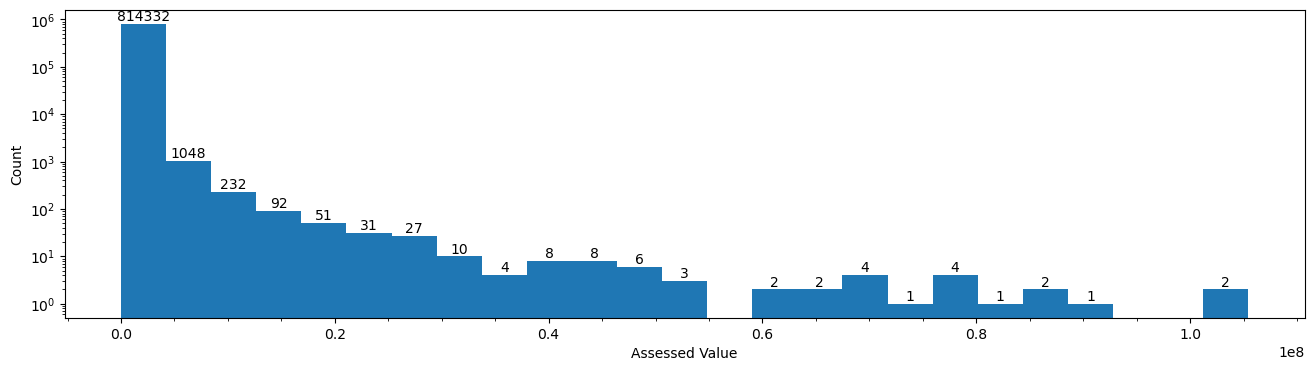

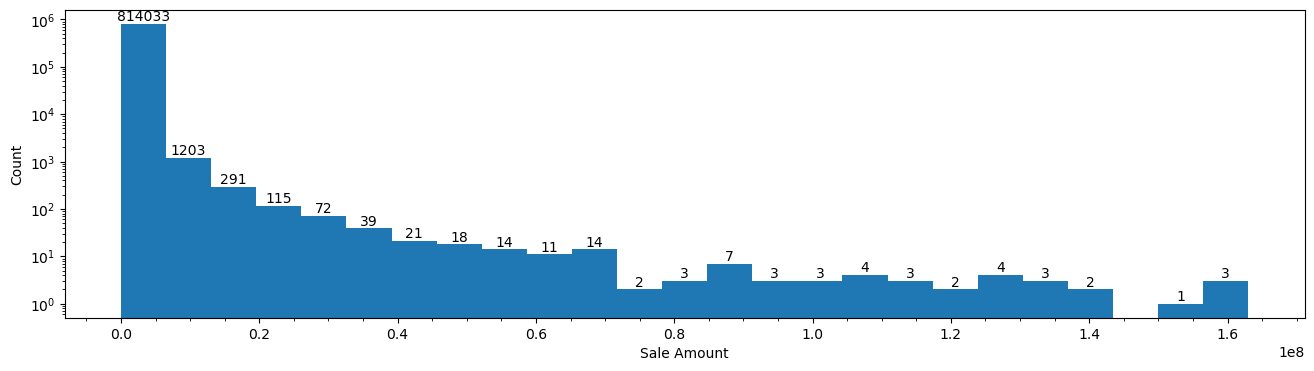

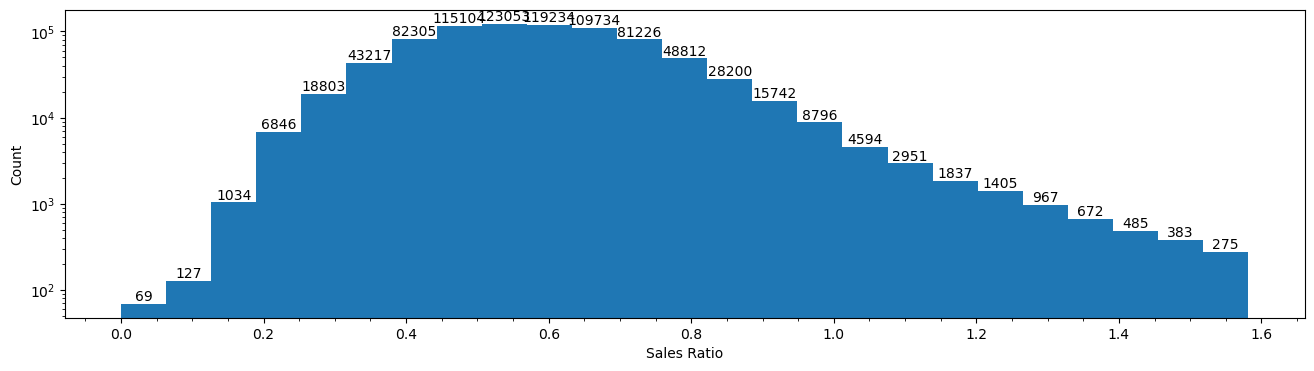

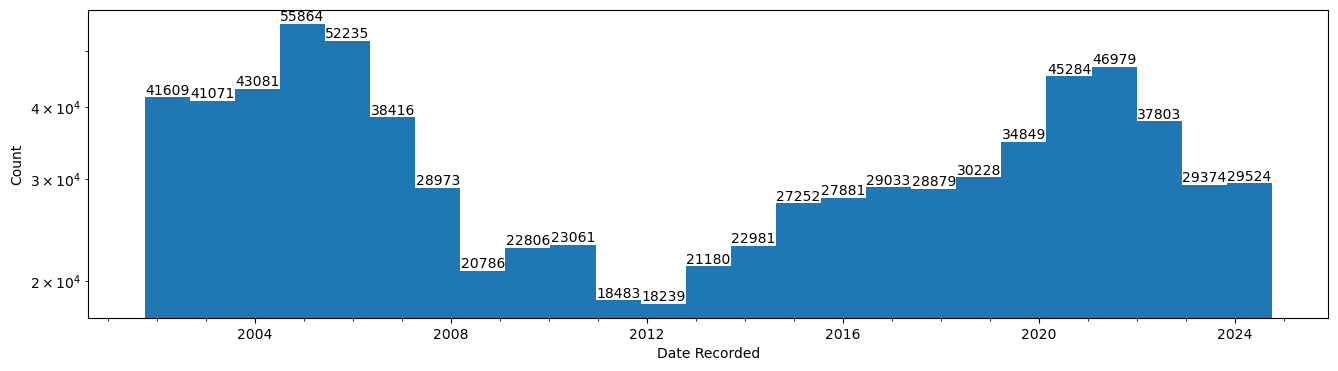

In [25]:
from matplotlib import pyplot as plt

numeric_columns = [
    'Assessed Value',
    'Sale Amount',
    'Sales Ratio',
    'Date Recorded',
]

for col in numeric_columns:
    plt.figure(figsize=(16,4))
    _, _, bar = plt.hist(df[col], bins = 25)
    plt.bar_label(bar)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.minorticks_on()
    plt.show()

## Categoric Data

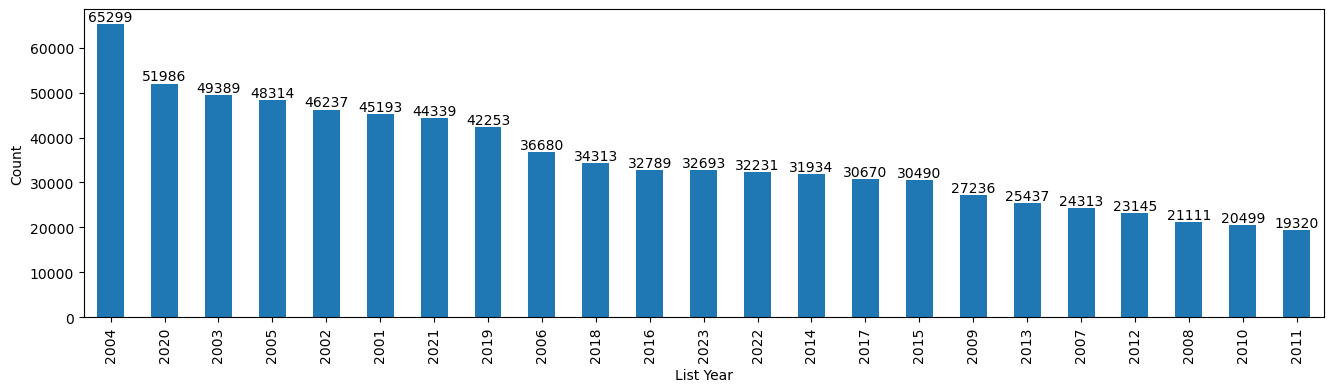

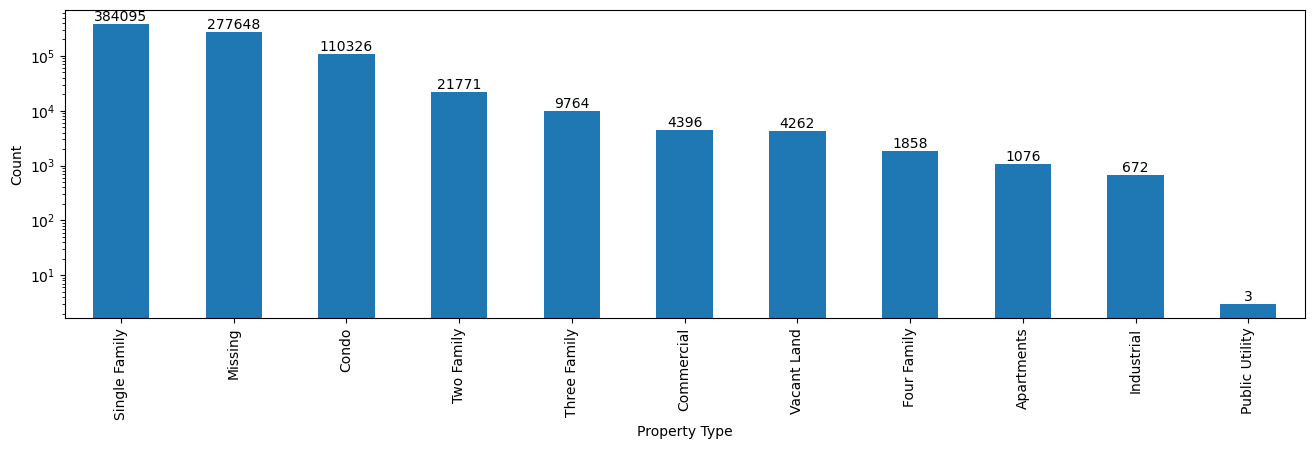

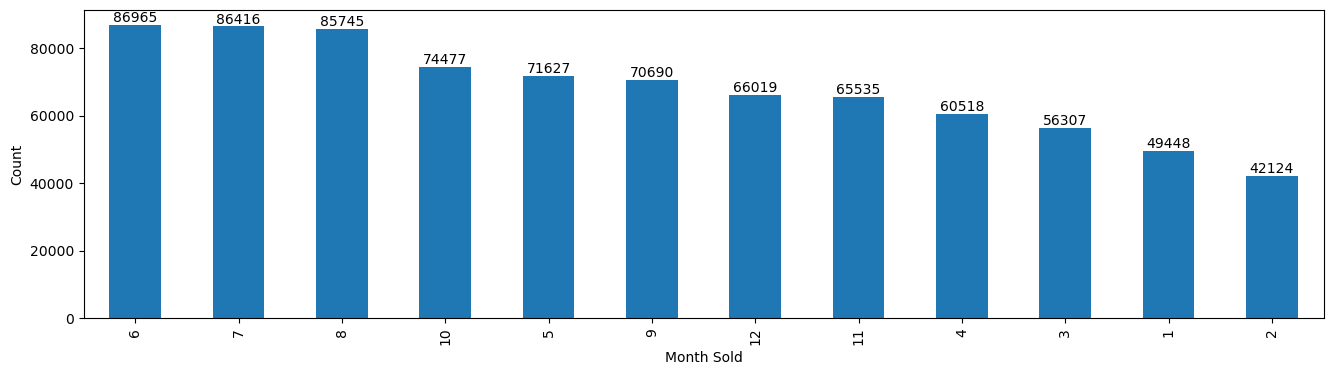

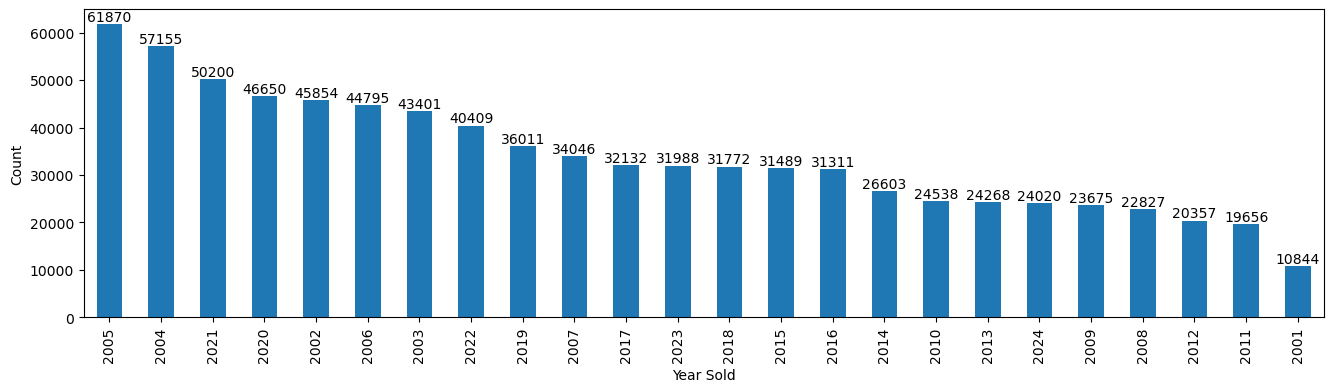

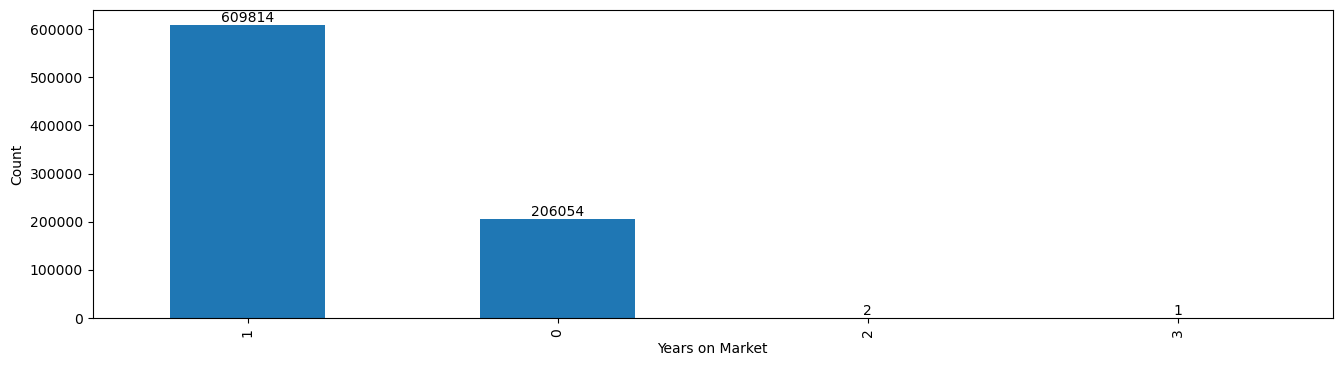

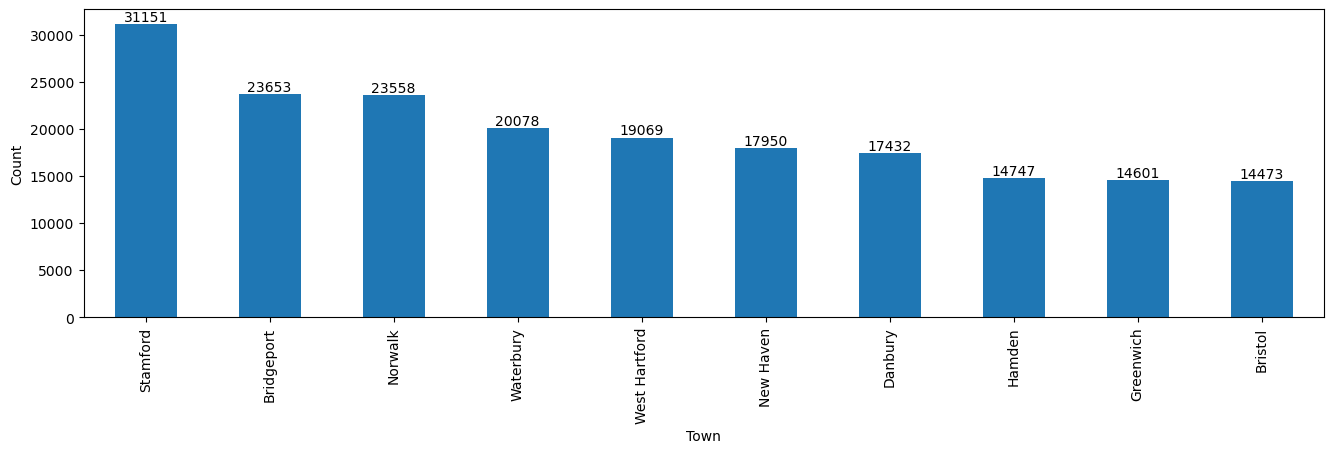

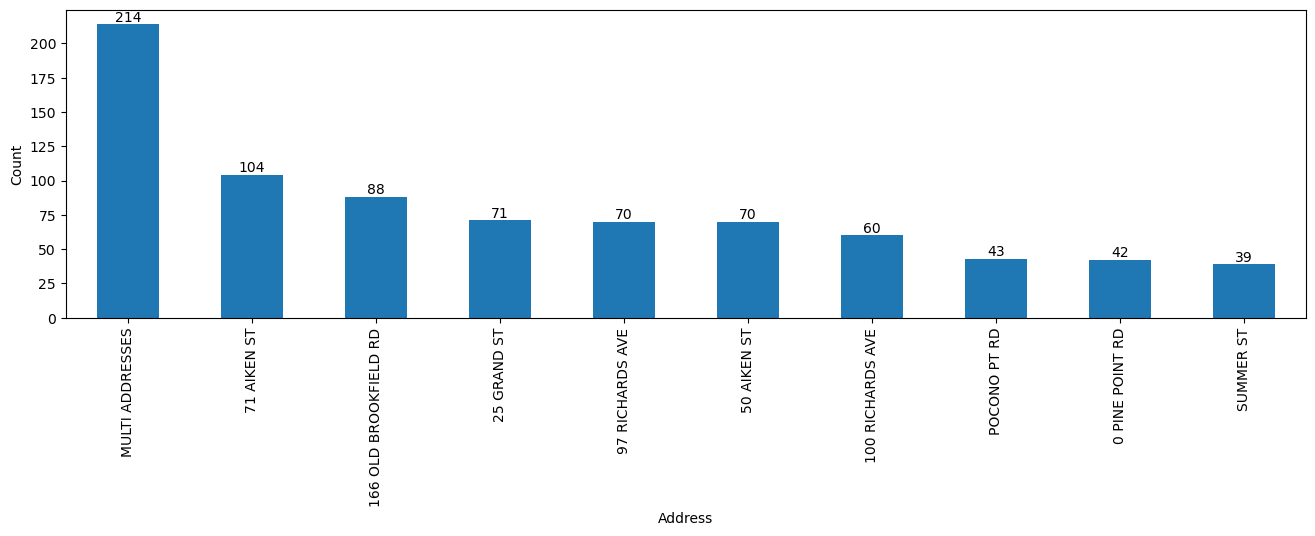

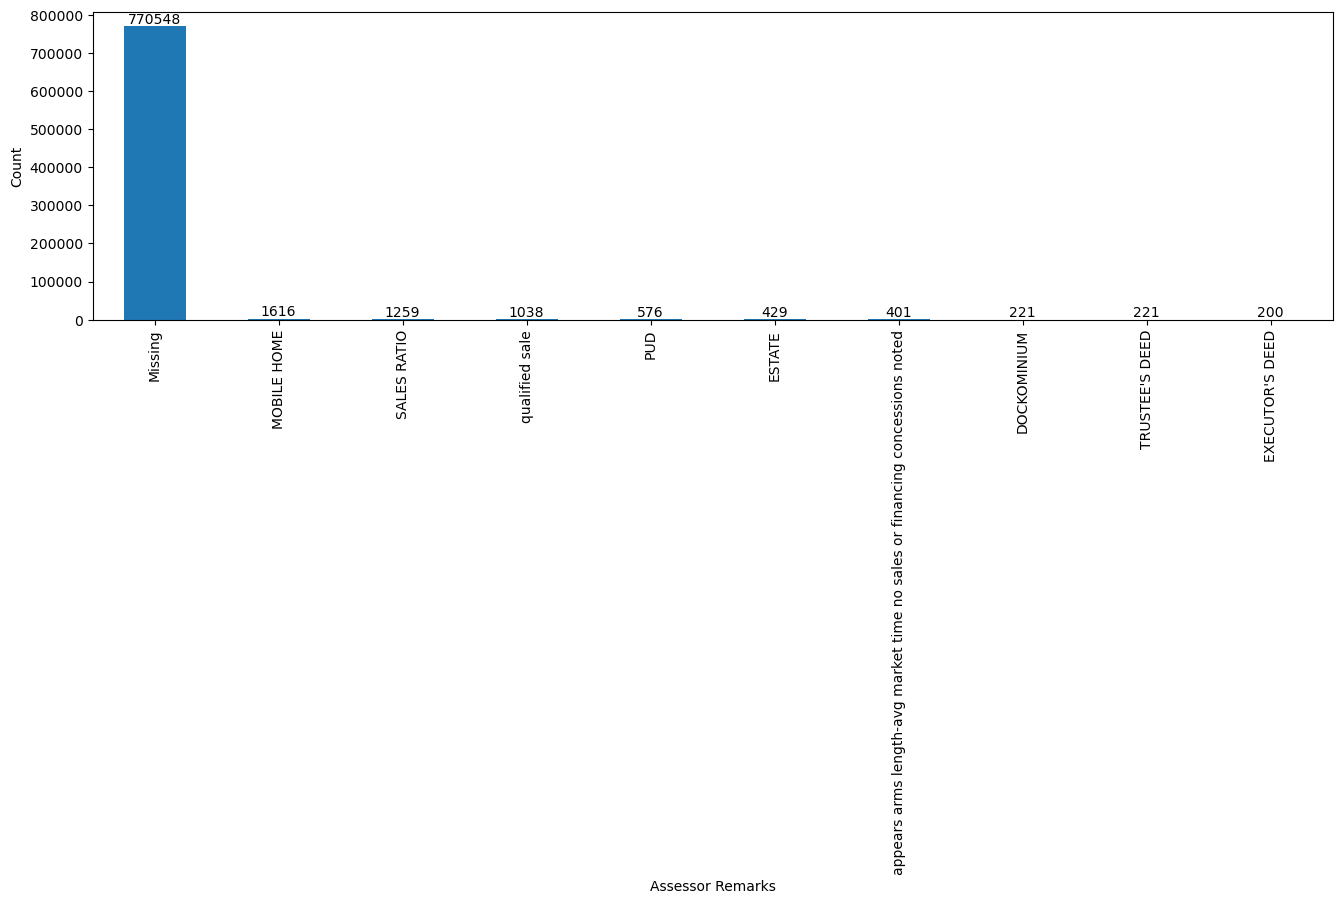

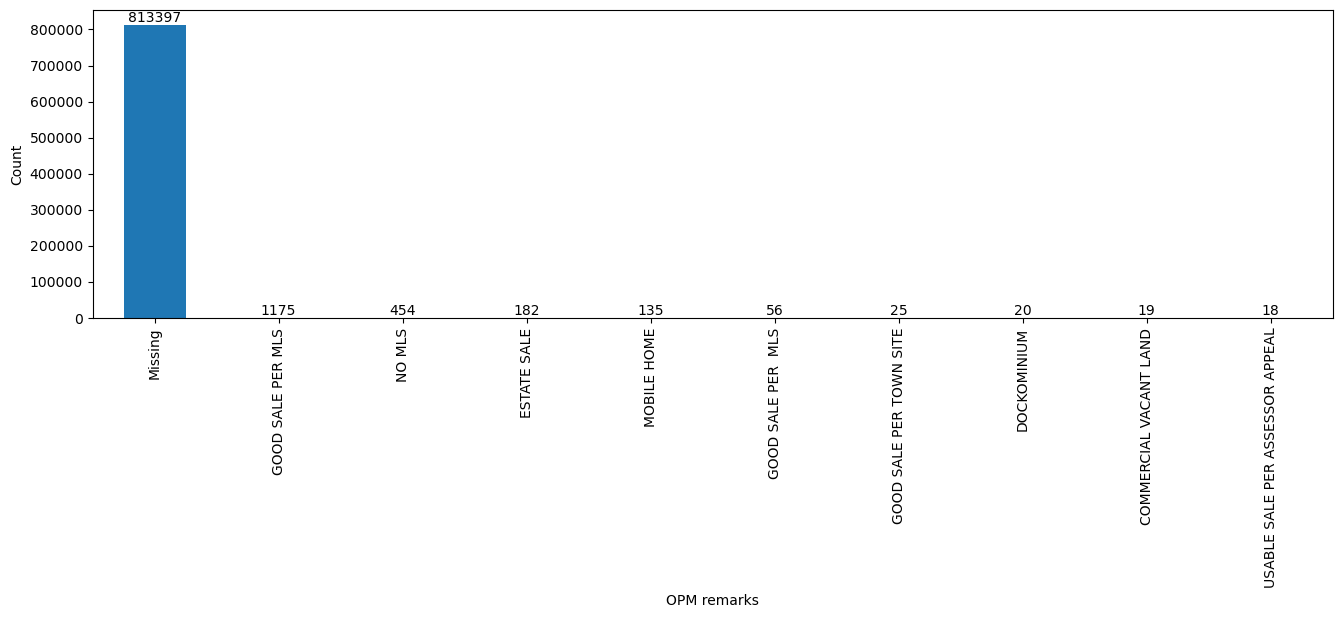

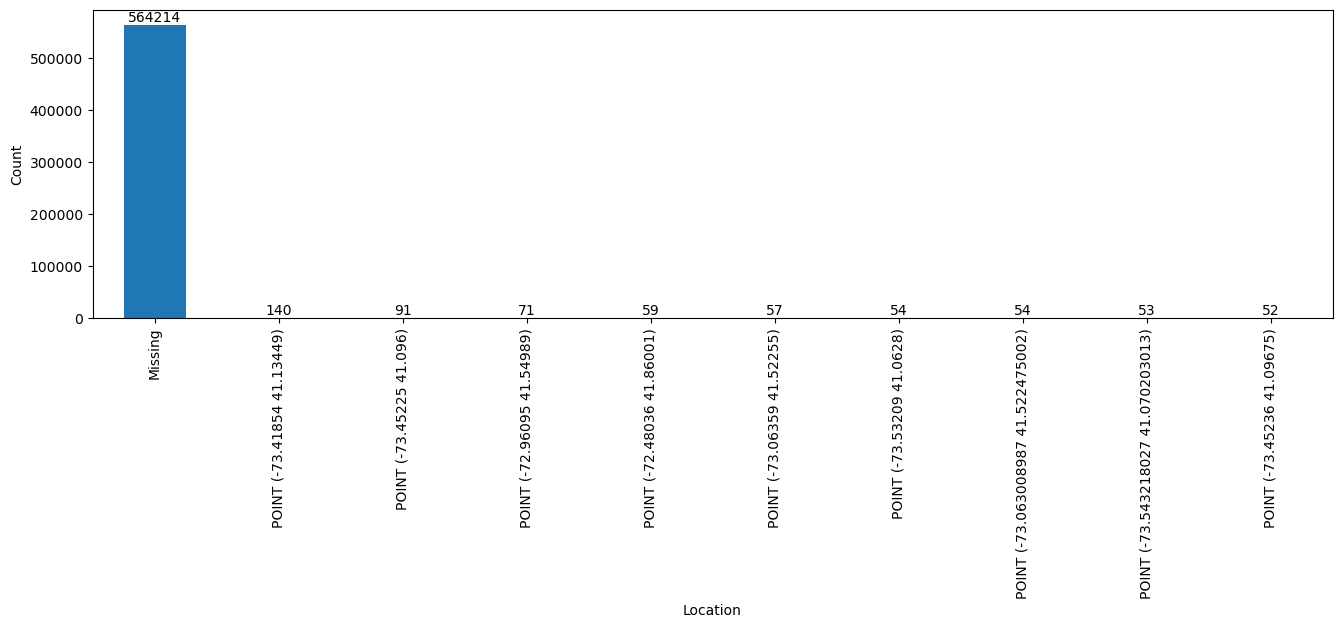

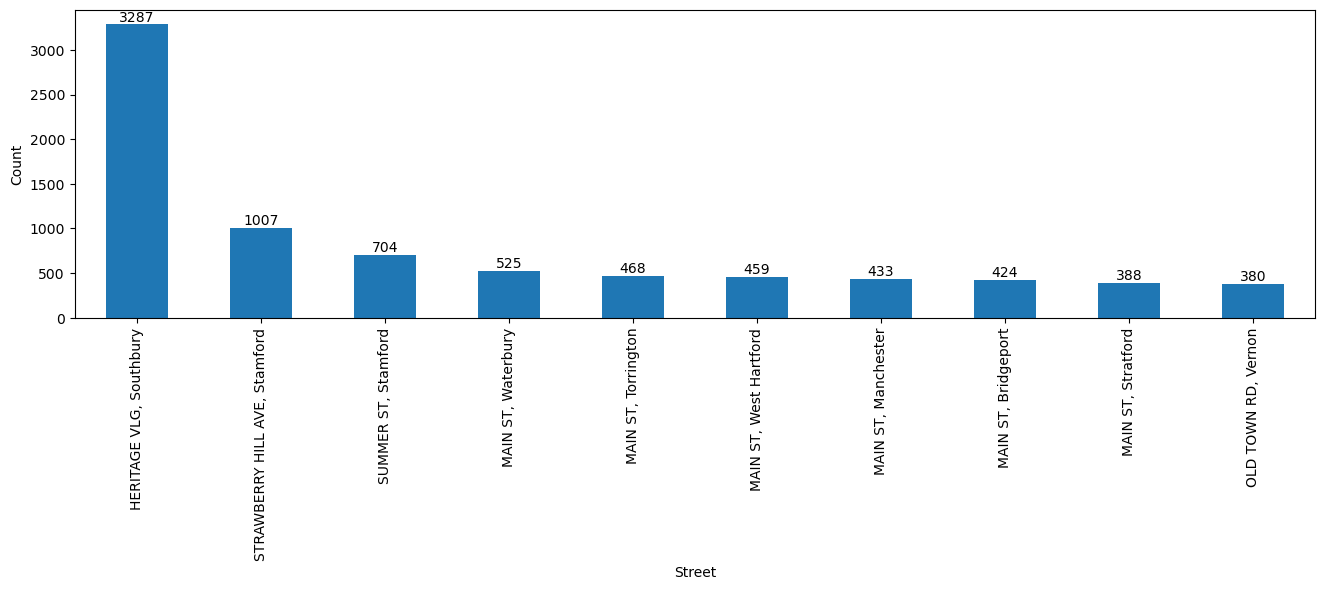

In [26]:
bar_columns = [
    'List Year',
    'Property Type',
    'Month Sold',
    'Year Sold',
    'Years on Market',
]

large_bar_columns = [
    'Town',
    'Address',
    'Assessor Remarks',
    'OPM remarks',
    'Location',	
    'Street',
]

for col in bar_columns:
    plt.figure(figsize=(16,4))
    if col == 'Property Type':
        plt.yscale('log')
    ax = df[col].value_counts().plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()


for col in large_bar_columns:
    plt.figure(figsize=(16,4))
    ax = df[col].value_counts().nlargest(10).plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()

In [27]:
df.sort_values(by = 'Sales Ratio', ascending = False).head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Street,Month Sold,Year Sold,Years on Market
751236,130027,2013,2014-02-19,Salem,9 RATHBUN HILL RD,42700.0,27000.0,1.581481,Missing,Missing,Missing,Missing,Missing,POINT (-72.2538 41.51796),"RATHBUN HILL RD, Salem",2,2014,1
703642,130303,2013,2013-12-10,Bridgeport,1153 IRANISTAN AVE,173900.0,110000.0,1.580909,Three Family,Three Family,Missing,Missing,Missing,Missing,"IRANISTAN AVE, Bridgeport",12,2013,0
884433,16205,2016,2017-06-23,Plainfield,60 COMMUNITY AVE,94840.0,60000.0,1.580667,Missing,Missing,Missing,Missing,Missing,Missing,"COMMUNITY AVE, Plainfield",6,2017,1
1131504,2300117,2023,2024-01-02,New Milford,36 PARK LN RD,217320.0,137500.0,1.580500,Vacant Land,Missing,Missing,Missing,GOOD SALE PER MLS,POINT (-73.41261 41.59477),"PARK LN RD, New Milford",1,2024,1
717838,130272,2013,2013-12-02,Bridgeport,857 PEARL HARBOR ST,82180.0,52000.0,1.580385,Single Family,Single Family,Missing,Missing,Missing,Missing,"PEARL HARBOR ST, Bridgeport",12,2013,0


## Average Sale Amounts

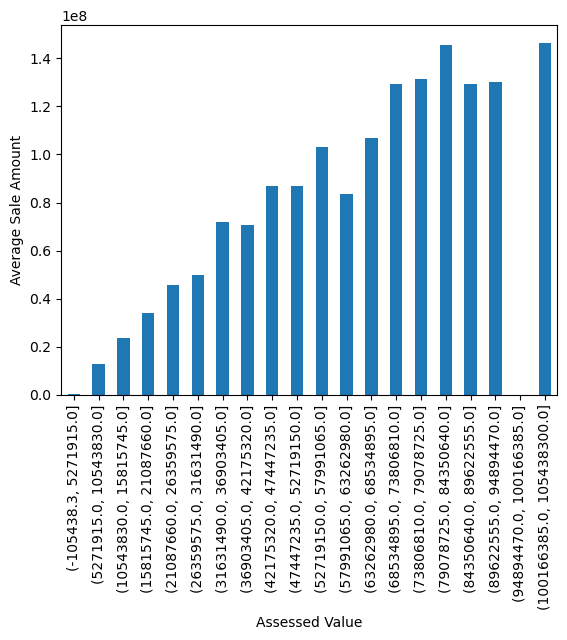

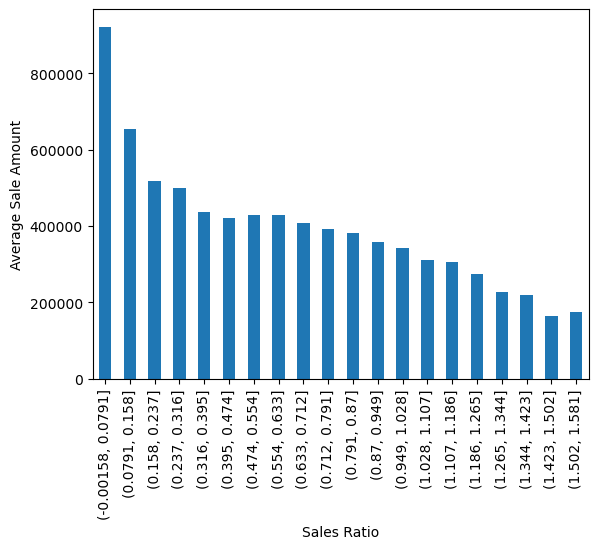

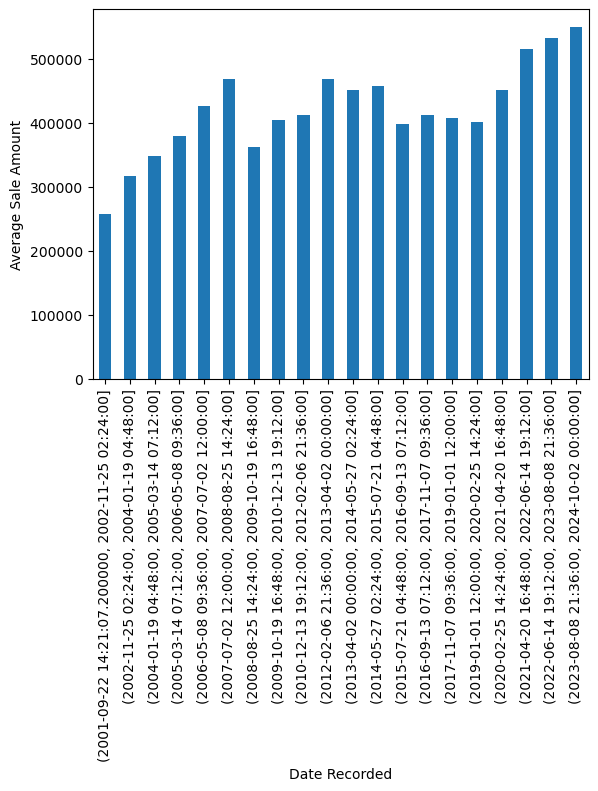

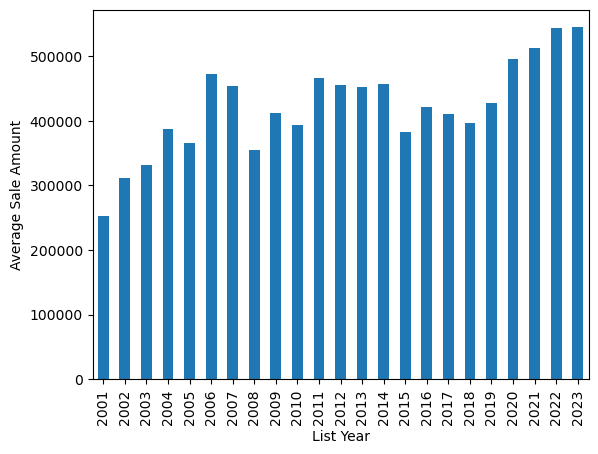

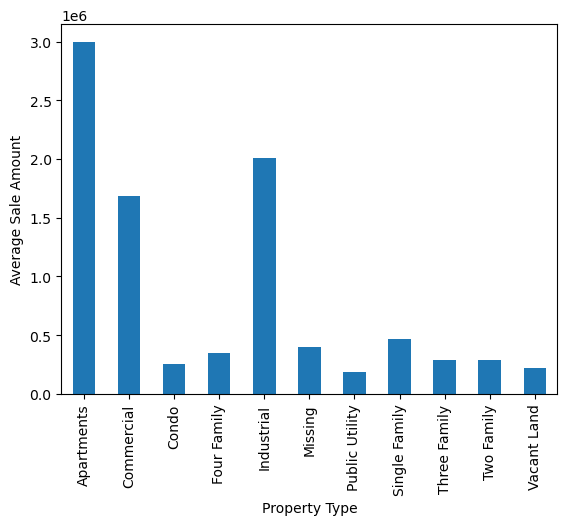

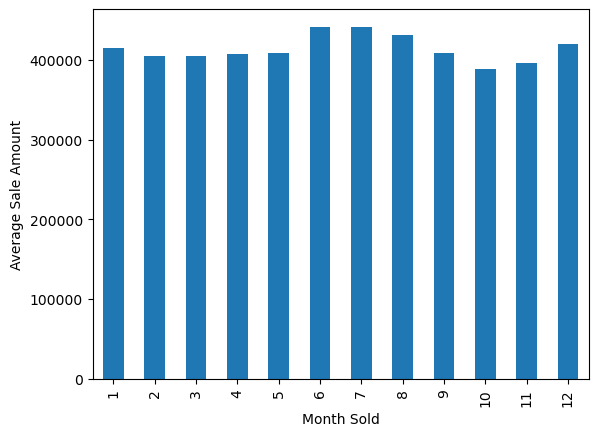

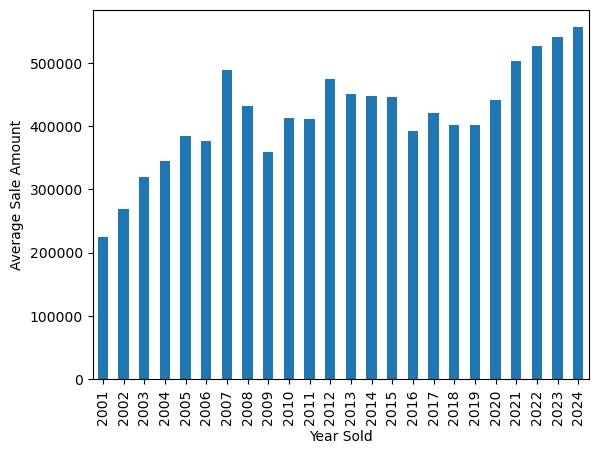

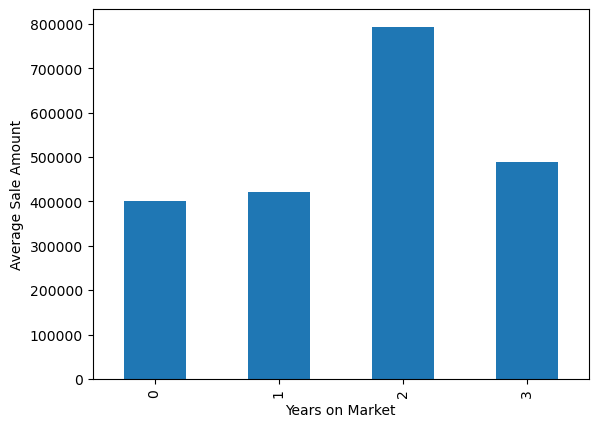

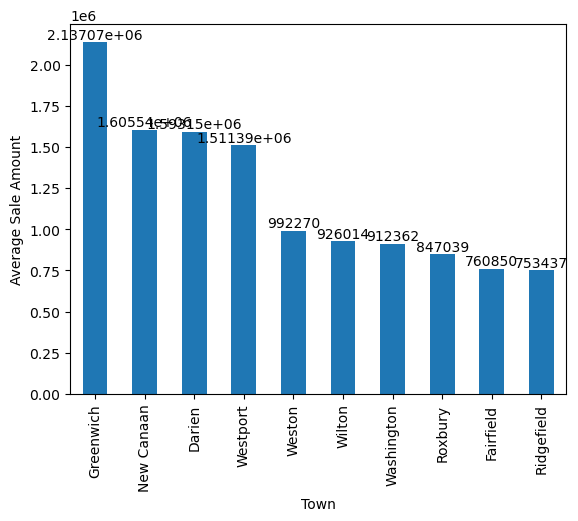

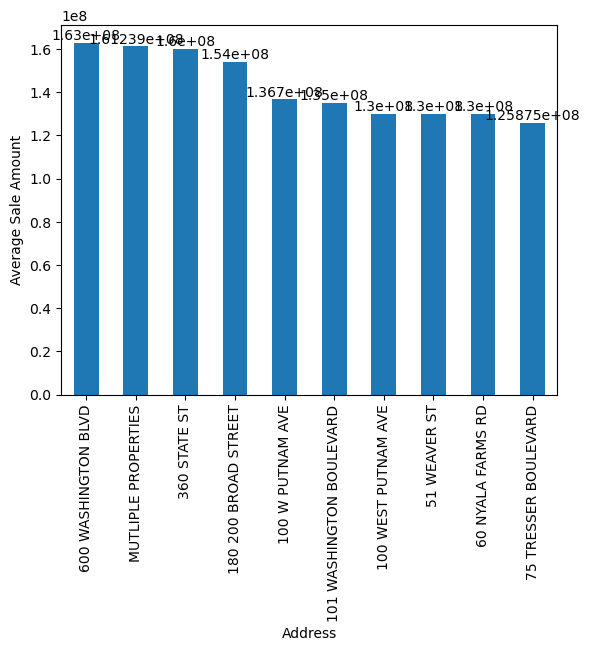

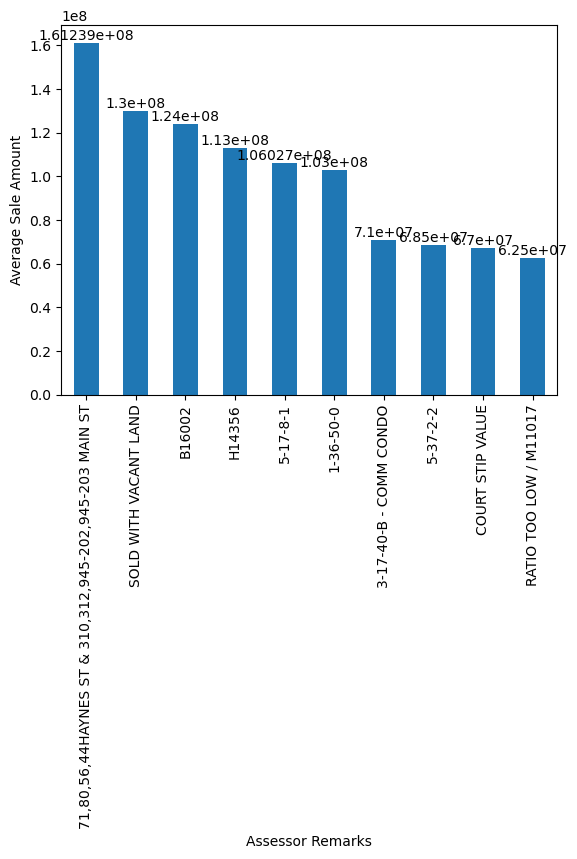

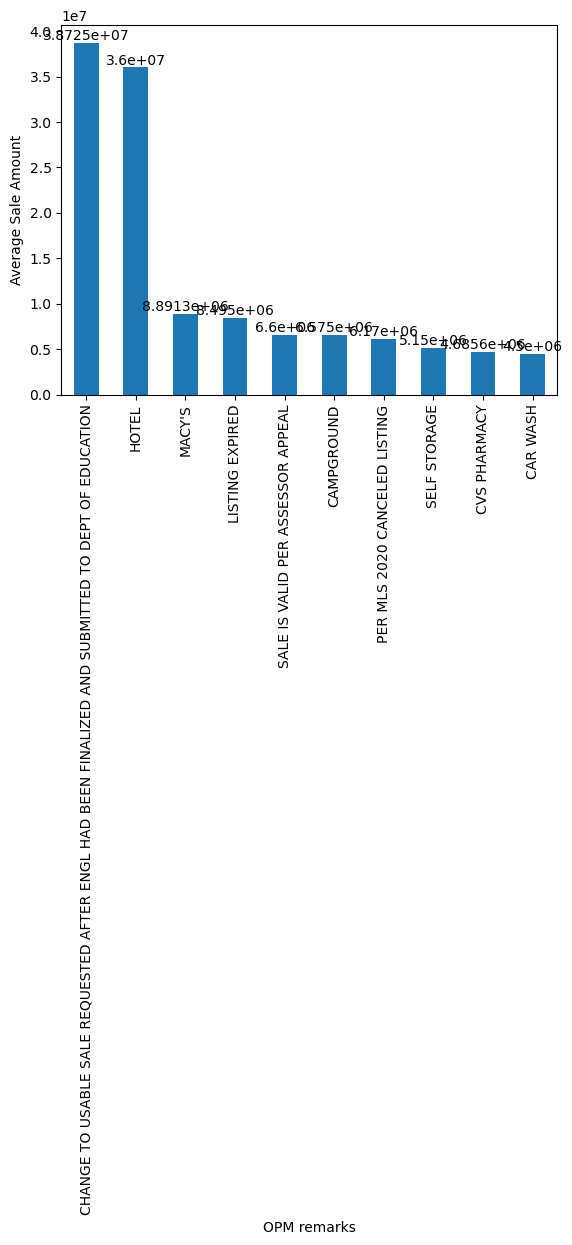

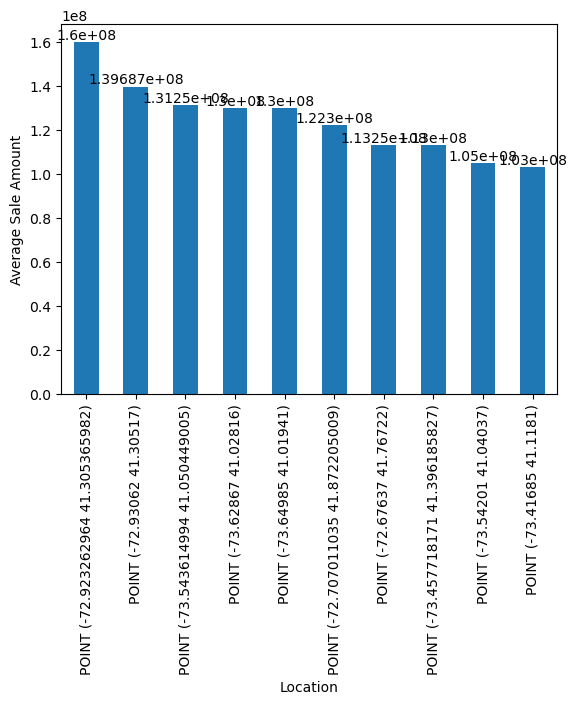

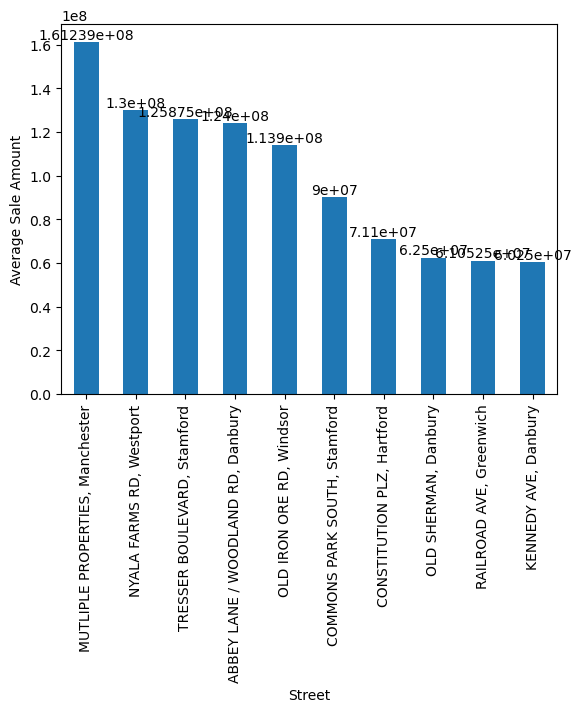

In [28]:
results = numeric_columns[1]

for col in numeric_columns:
    if col == results:
        continue
    df.groupby(pd.cut(df[col],bins = 20),observed=False)[results].mean().plot(kind = 'bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in bar_columns:
    ax = df.groupby(col,observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()


for col in large_bar_columns:
    ax = df.groupby(col,observed=False)[results].mean().nlargest(10).plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel(f'Average {results}')
    plt.show()

# Model Building

## Pipeline

OneHotEncoder is best for categorical features, but since this dataset involves high-cardinality categorical features like Street, OneHotEncoder is impractical and will use too much memory. Instead, we can use TargetEncoder 

change^

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, TargetEncoder, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, AdaBoostRegressor

N_JOBS = 20

def make_pipeline(X,estimator=Ridge()):
    small_encoder = OneHotEncoder(
        handle_unknown='warn',
        sparse_output=False,
    )
    large_encoder = TargetEncoder()

    small_columns = []
    large_columns = []
    transformers = []

    for col in X.columns:
        if col in {
            'Property Type', 
            'Month Sold',
        }:
            small_columns.append(col)
            
        if col in {
            'Town',
            'Address',
            'Assessor Remarks',
            'OPM remarks',
            'Location',	
            'Street',
        }:
            large_columns.append(col)

    if small_columns:
        transformers.append(
            (
                'small_encode',
                small_encoder,
                small_columns,
            )
        )
    if large_columns:
        transformers.append(
            (
                'large_encode',
                large_encoder,
                large_columns,
            )
        )
    
    column_trans = ColumnTransformer(
        transformers=transformers,
        remainder='passthrough',
        n_jobs=N_JOBS,
    )
    
    steps=[]
    if not isinstance(estimator,HistGradientBoostingRegressor) or not isinstance(estimator,AdaBoostRegressor):
        steps.append(
            (
                'encode',
                column_trans,
            )
        )
    steps.append(
        (
            'scale',
            StandardScaler(),
        )
    )
    steps.append(
        (
            'estimator',
            estimator,
        )
    )
    pipe = Pipeline(steps=steps)
    return pipe

def make_grid(X,estimators):
    grid = GridSearchCV(
        make_pipeline(X),
        estimators,
        cv=2,
        n_jobs=N_JOBS,
    )
    return grid

def predict_results(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_pred

## Estimators

In [30]:
from sklearn.linear_model import LinearRegression, Lars, BayesianRidge, ARDRegression, RANSACRegressor

def make_estimators():
    estimators = [
        #{
        #    'estimator':[LinearRegression()],
        #},
        {
            'scale':[StandardScaler(),RobustScaler(),PowerTransformer()],
            'estimator':[Ridge()],
            'estimator__alpha':[0.1,1,10],
        },
        {
            'scale':[StandardScaler(),RobustScaler(),PowerTransformer()],
            'estimator':[HistGradientBoostingRegressor(categorical_features='from_dtype')],
            'estimator__learning_rate':[0.01,0.1,1],
            'estimator__max_iter':[100,200,500],
        },
        #{
        #    'scale':[StandardScaler(),RobustScaler(),PowerTransformer()],
        #    'estimator':[AdaBoostRegressor()]
        #},
        #{
            #'estimator':[BayesianRidge()],
            #'estimator__alpha_1':np.linspace(1e-6,10,3),
            #'estimator__alpha_2':np.linspace(1e-6,10,3),
            #'estimator__lambda_1':np.linspace(1e-6,10,3),
            #'estimator__lambda_2':np.linspace(1e-6,10,3),
        #},
        #{
            #'estimator':[ARDRegression()],        
            #'estimator__alpha_1':np.linspace(1e-6,10,3),
            #'estimator__alpha_2':np.linspace(1e-6,10,3),
            #'estimator__lambda_1':np.linspace(1e-6,10,3),
            #'estimator__lambda_2':np.linspace(1e-6,10,3),
        #},
    ]
    return estimators

# Results

In [31]:
from sklearn.metrics import r2_score, PredictionErrorDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

def accuracy_plot(y_test,y_pred,ax,feature):
    x = np.linspace(
        min(min(y_test),
            min(y_pred)), 
        max(max(y_test),
            max(y_pred)), 
        100,
    )
    ax.plot(x, x, color='red')
    ax.scatter(y_test,y_pred)
    ax.set_title('Model Performance')
    ax.set_xlabel(f'True {feature}')
    ax.set_ylabel(f'Predicted {feature}')
    
def residual_plot(y_test,y_pred,ax):
    PredictionErrorDisplay.from_predictions(y_test,y_pred,ax=ax)
    ax.set_title('Residual Plot')
    
def box_plots(X_train,X_test,y_train,y_test,model):
    fig, axs = plt.subplots(2,figsize=(16,8))
    for X,y,ax,title in [(X_train,y_train,axs[0],'Training Data'),(X_test,y_test,axs[1],'Testing Data')]:
        result = permutation_importance(
            model,
            X, 
            y,  
            n_jobs=N_JOBS,
        )
        pd.DataFrame(
            result.importances.T,
            columns=X.columns
        ).boxplot(vert=False,whis=10,ax=ax)
        ax.set_title(title)

def plot_results(X_train,X_test,y_train,y_test,y_pred,model,feature):
    print(f'r2_train = {model.score(X_train, y_train)}',f'r2_test = {model.score(X_test, y_test)}')
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    accuracy_plot(y_test,y_pred,axs[0],feature)
    residual_plot(y_test,y_pred,axs[1])
    plt.show()
    box_plots(X_train,X_test,y_train,y_test,model)
    plt.show()
    PartialDependenceDisplay.from_estimator(
        model, 
        X_test, 
        X_test.select_dtypes(include='number').columns, 
        n_jobs=N_JOBS,
    )

In [32]:
def predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature, estimators=None):

    X_train = X_train[x_features].copy()
    X_test = X_test[x_features].copy()
    y_train = y_train[y_feature].copy()
    y_test = y_test[y_feature].copy()

    if not estimators:
        estimators = make_estimators()
    grid = make_grid(X_test,estimators)
    y_pred = predict_results(
        X_train,
        X_test,
        y_train,
        y_test,
        grid,
    )
    
    best_pipe = grid.best_estimator_
    print(best_pipe['scale'])
    print(best_pipe['estimator'])
    
    plot_results(
        X_train,
        X_test,
        y_train,
        y_test,
        y_pred,
        grid,
        y_feature,
    )

In [33]:
X = df[[
    'List Year',
    'Date Recorded',
    'Town',
    'Assessed Value',
    'Property Type',
    'Street',
    'Month Sold',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
]].copy()

X['Date Recorded'] = X['Date Recorded'].astype('int64')

y = df[['Sale Amount','Sales Ratio']]
X.head()

,List Year,Date Recorded,Town,Assessed Value,Property Type,Street,Month Sold,Year Sold,Years on Market,Assessor Remarks,OPM remarks
0,2020,1618358400000000000,Ansonia,133000.0,Single Family,"BEAVER ST, Ansonia",4,2021,1,Missing,Missing
1,2020,1621987200000000000,Ansonia,110500.0,Three Family,"JACKSON ST, Ansonia",5,2021,1,Missing,Missing
2,2020,1631491200000000000,Ansonia,150500.0,Commercial,"WAKELEE AVE, Ansonia",9,2021,1,Missing,Missing
3,2020,1607904000000000000,Ansonia,127400.0,Two Family,"PLATT ST, Ansonia",12,2020,0,Missing,Missing
4,2021,1655683200000000000,Avon,179990.0,Condo,"BYRON DRIVE, Avon",6,2022,1,Missing,Missing


## All Features - Sale Amount

StandardScaler()
Ridge(alpha=0.1)
r2_train = 0.9042486156987346 r2_test = 0.8981936700513002


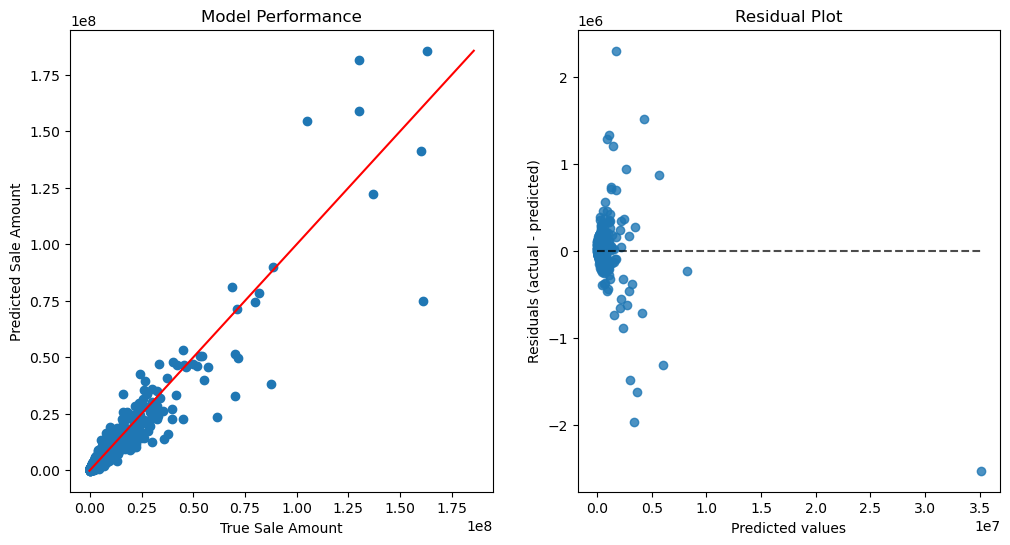

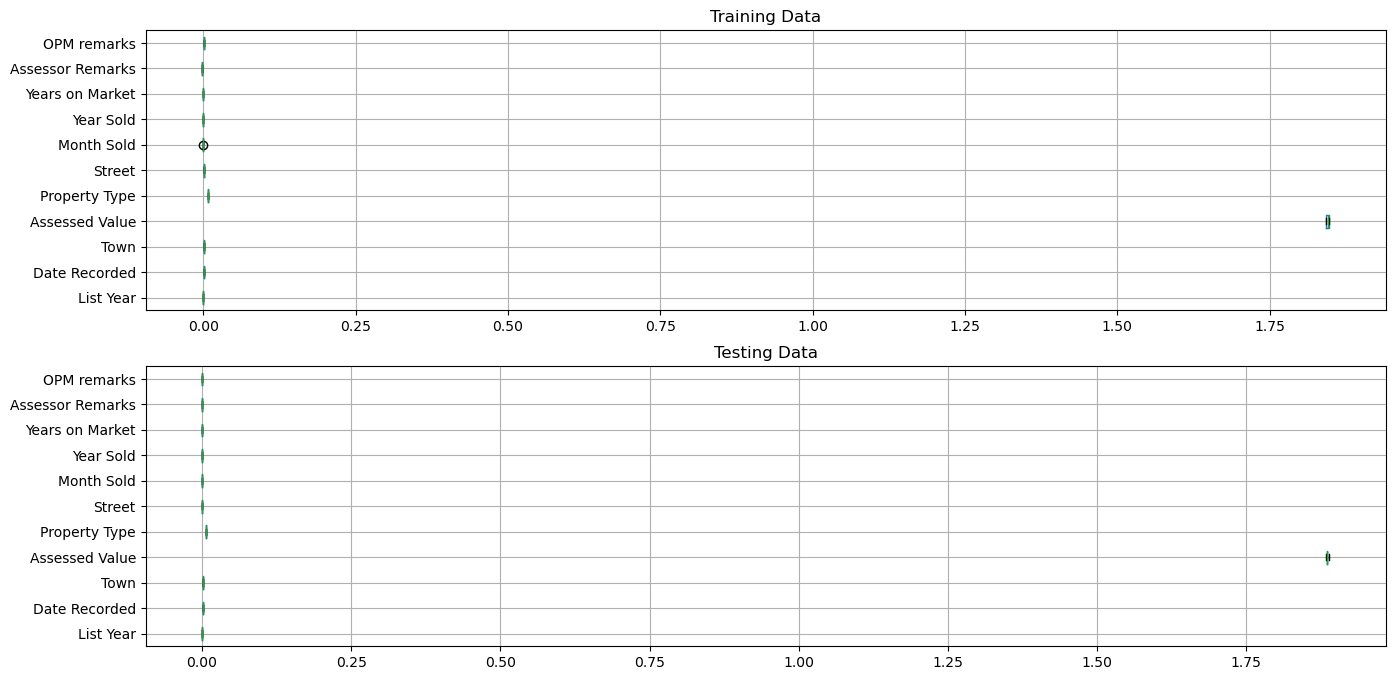

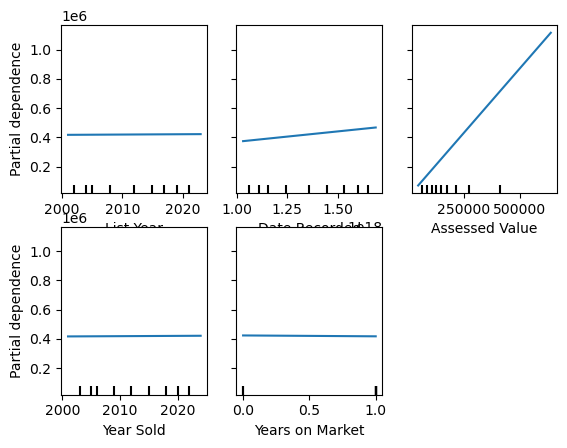

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

x_features = [
    'List Year',
    'Date Recorded',
    'Town',
    'Assessed Value',
    'Property Type',
    'Street',
    'Month Sold',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
]
y_feature = 'Sale Amount'

predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature)

## Only Access Value - Sale Amount

StandardScaler()
Ridge(alpha=10)
r2_train = 0.9045579670749718 r2_test = 0.8962153127525277


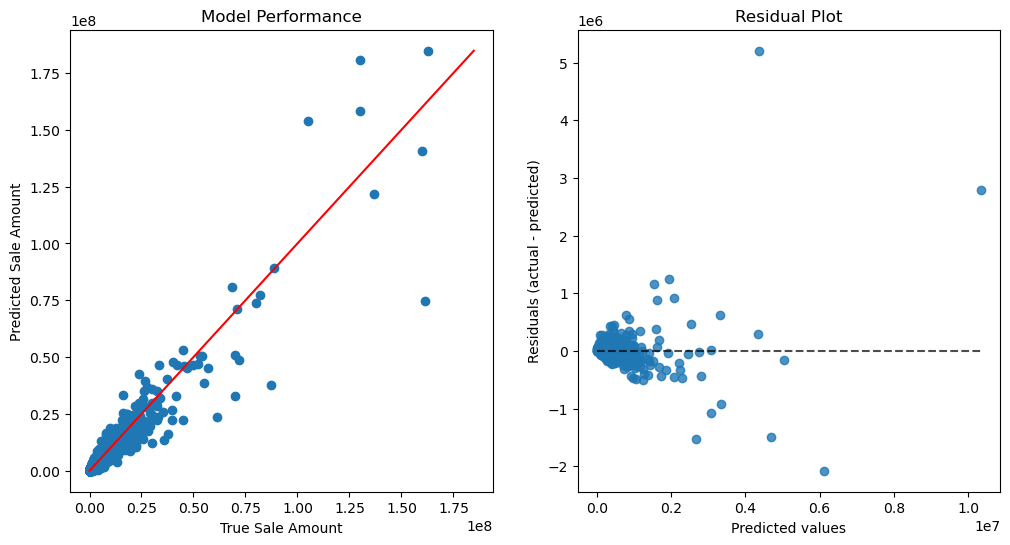

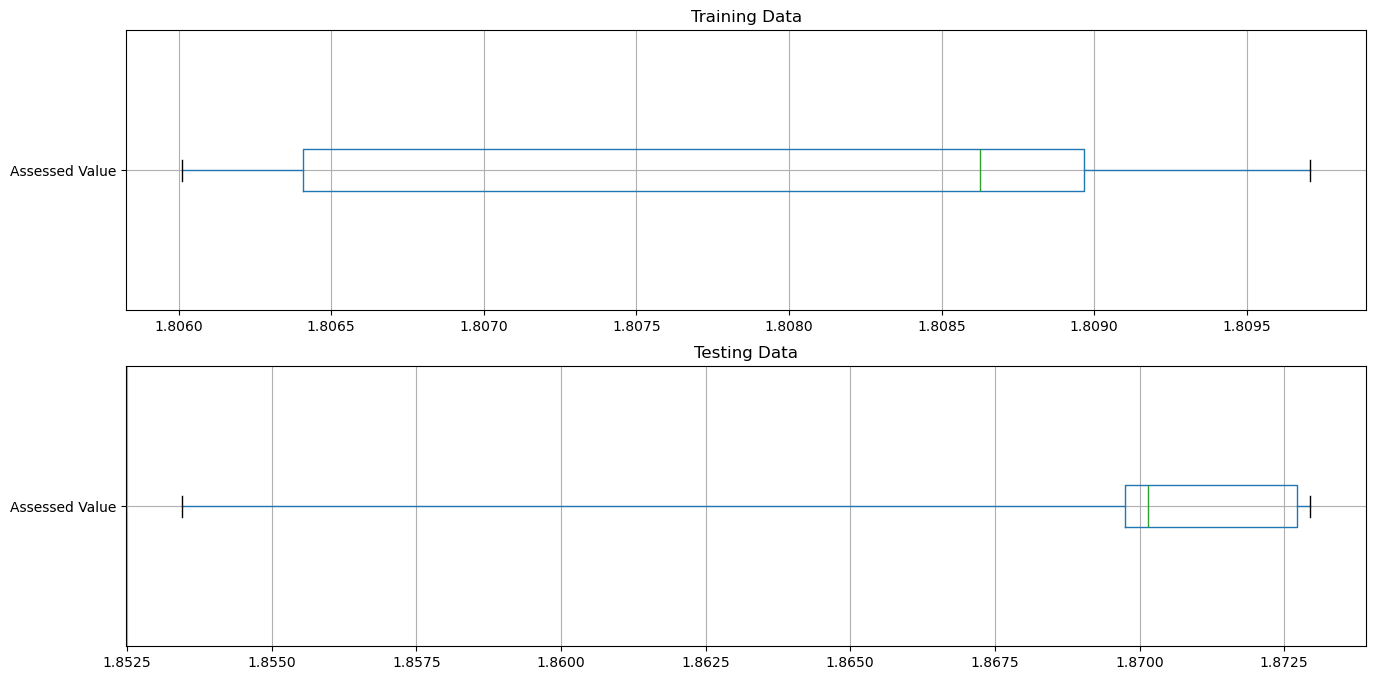

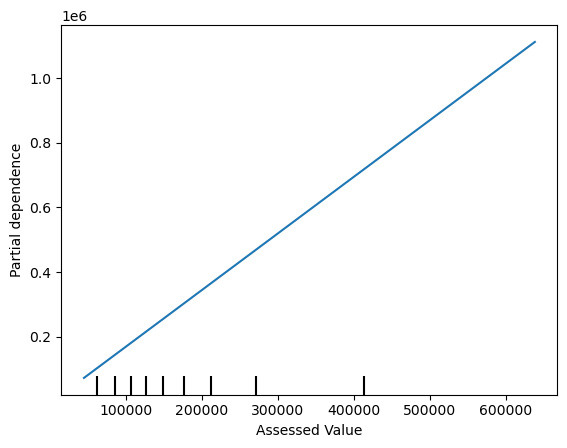

In [35]:
x_features = ['Assessed Value']
y_feature = 'Sale Amount'

predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature)

## All but Assessed Value - Sale Amount

StandardScaler()
Ridge(alpha=0.1)
r2_train = 0.3531002929562722 r2_test = 0.1295366258080628


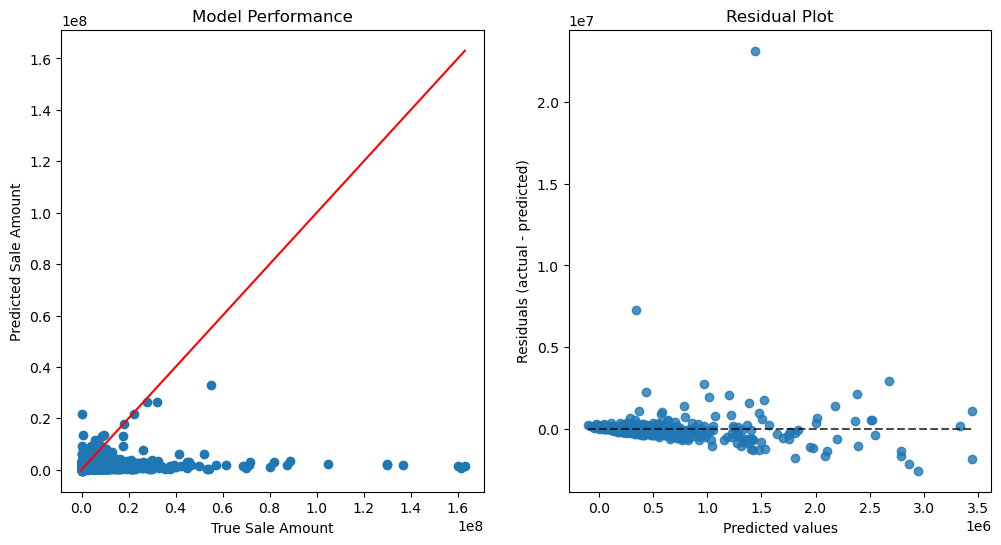

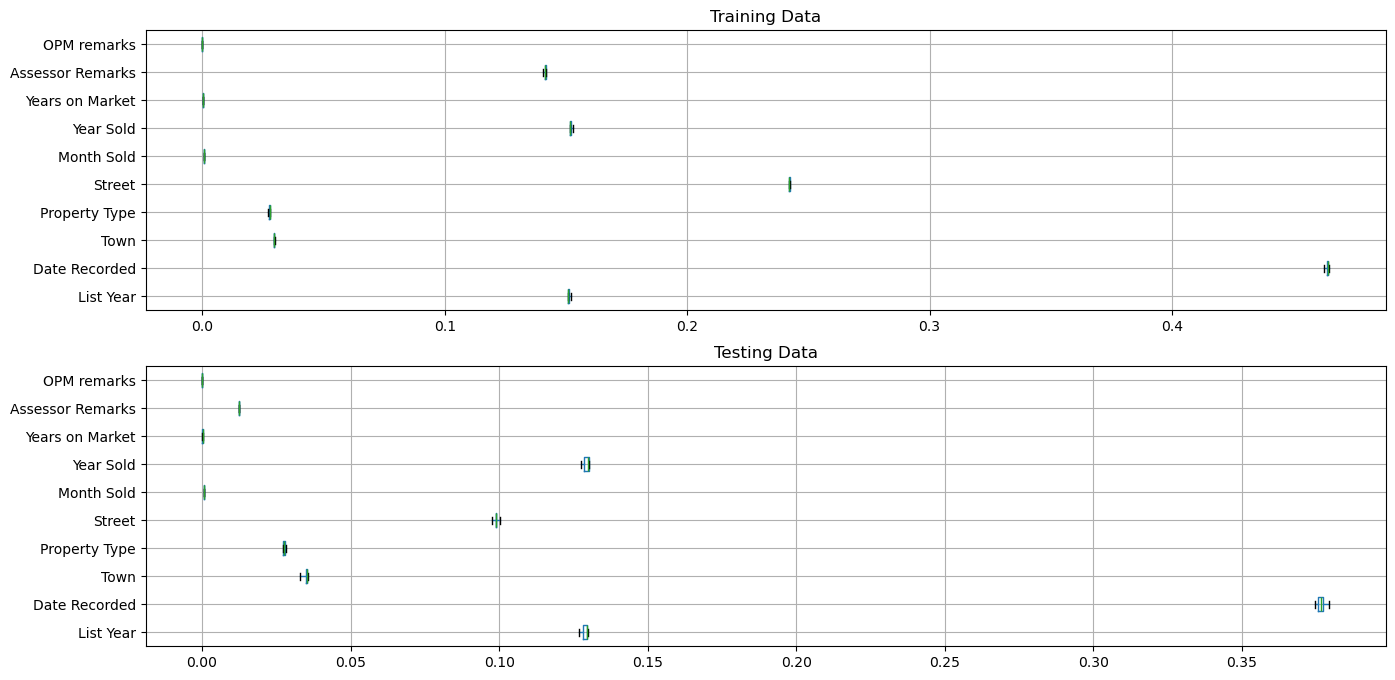

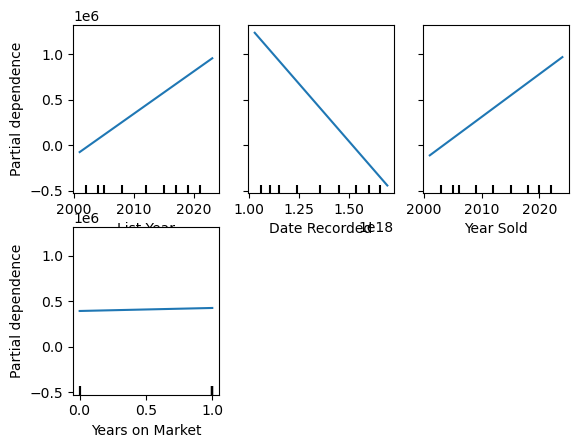

In [36]:
x_features = [
    'List Year',
    'Date Recorded',
    'Town',
    'Property Type',
    'Street',
    'Month Sold',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
]
y_feature = 'Sale Amount'

predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature)

## All but Assessed Value - Sale Ratio

C:\Users\jonah\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jonah\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\jonah\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jonah\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

StandardScaler()
HistGradientBoostingRegressor(max_iter=500)
r2_train = 0.5426911713300356 r2_test = 0.5044392217731986


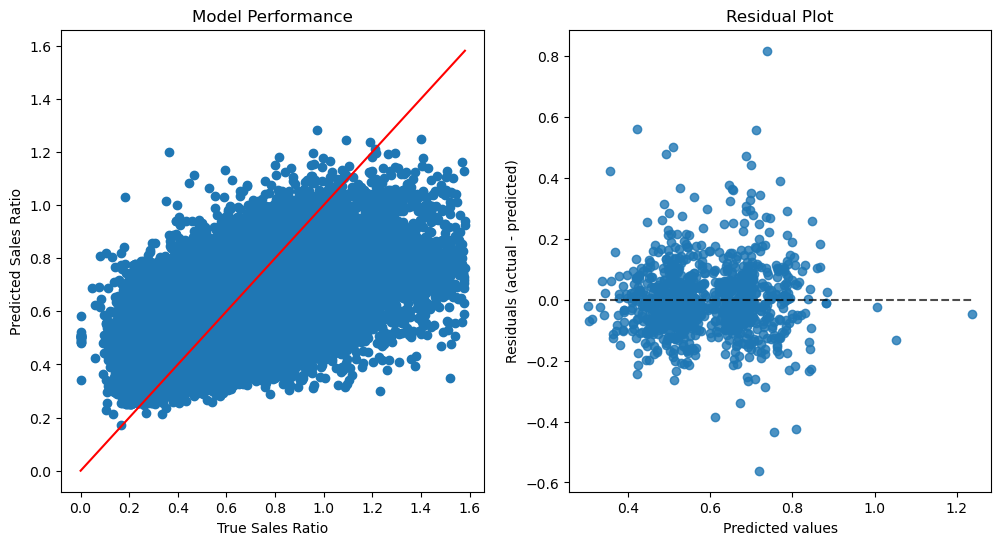

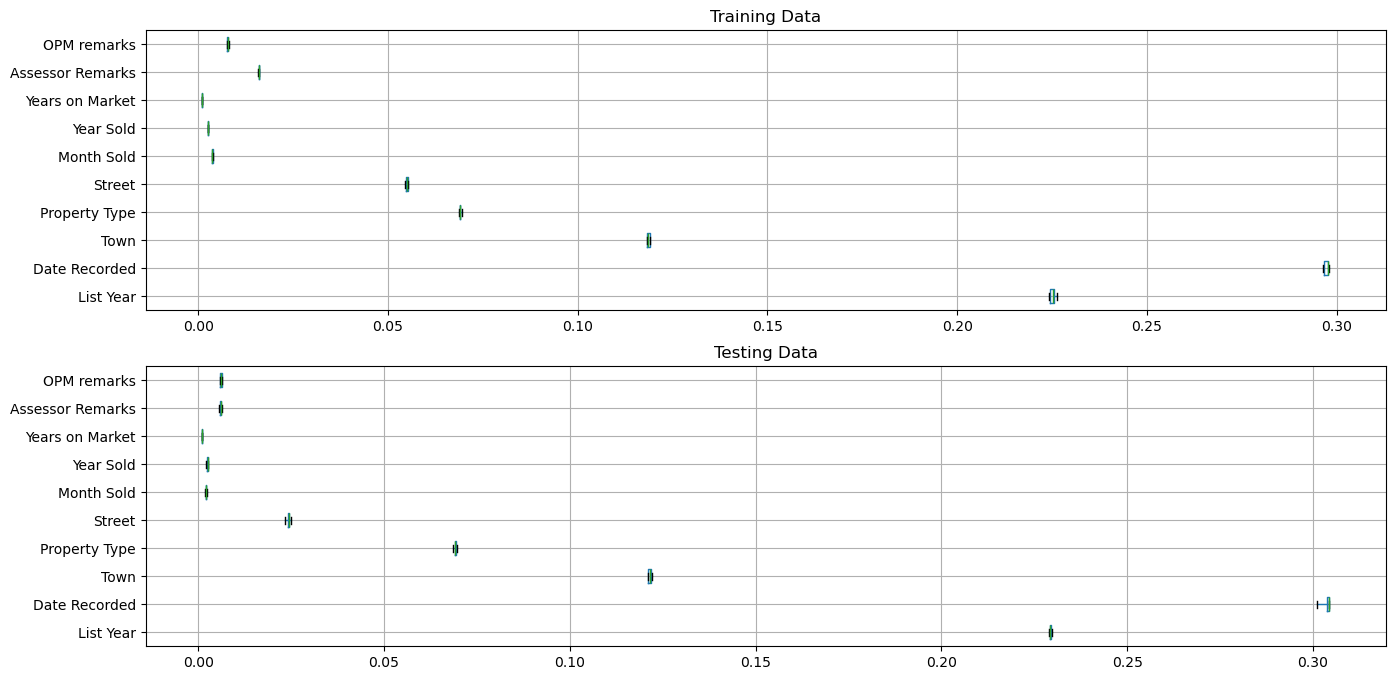

In [ ]:
x_features = [
    'List Year',
    'Date Recorded',
    'Town',
    'Property Type',
    'Street',
    'Month Sold',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
]
y_feature = 'Sales Ratio'

predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature)